<a href="https://colab.research.google.com/github/Zewtta/PEL219_2025_RedesNeuraisArtificiais/blob/main/PEL219_Perceptron_Matheus_Vieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tarefa 1 - Perceptron**
##Aluno: Matheus Vieira

### Estudo do código de referência

[-45. -41. -14. -33. -42.   7.  67.  38.  59.  66.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


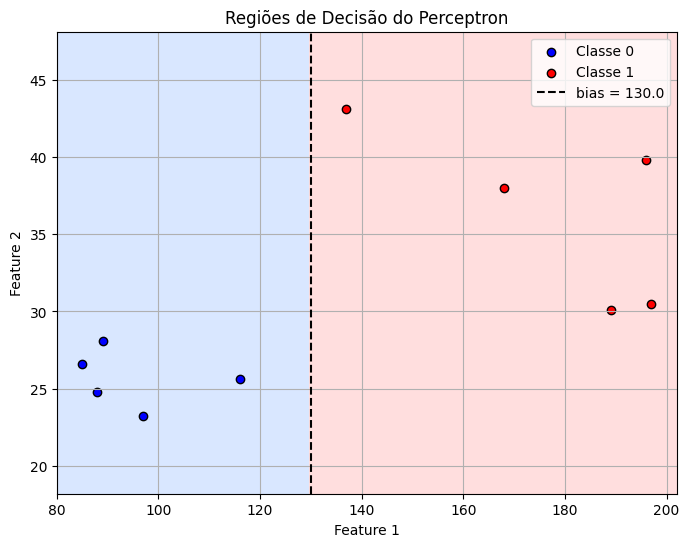

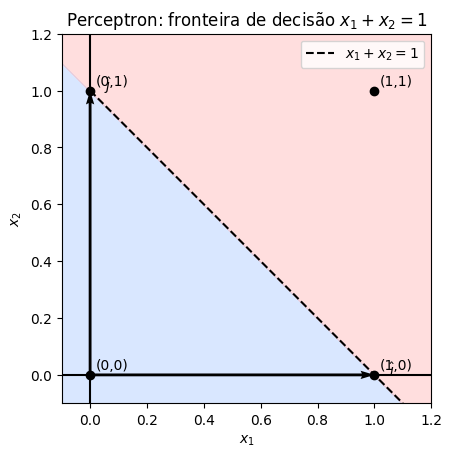

In [12]:
 # Importa a biblioteca matemática numpy
import numpy as np
import matplotlib.pyplot as plt


# Cria os vetores com os dados
X = np.array([[85, 26.6],[89, 28.1],[116, 25.6],[97, 23.2],[88, 24.8],[137, 43.1],[197, 30.5],[168, 38.0],[189, 30.1],[196, 39.8]])
y = np.array([0,0,0,0,0,1,1,1,1,1])


# Cria o vetorde pesos das sinapses
w = np.array([-130, 1, 0])

# Adicionando a coluna de 1 para o bias
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Multiplica osvetores de entrada e de peso
net = np.dot(X, w)
print (net)

# Aplica a função degrau para calculara saida
out = np.heaviside(net, 0)
print (out)


# Gráfico para visualização da dispersão dos pontos e delimitação do modelo

# --- VISUALIZAÇÃO DA REGIÃO DE DECISÃO ---
import matplotlib.pyplot as plt
import numpy as np

# Dados (já calculados antes)
# X ainda contém a coluna de bias [1, x1, x2]
# então as features reais são X[:,1] e X[:,2]

# cria grade de pontos (para desenhar o fundo colorido da decisão)
x1_min, x1_max = X[:,1].min() - 5, X[:,1].max() + 5
x2_min, x2_max = X[:,2].min() - 5, X[:,2].max() + 5
xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 200),
    np.linspace(x2_min, x2_max, 200)
)

# calcula o net (soma ponderada) para cada ponto da grade
net_grid = w[0] + w[1]*xx1 + w[2]*xx2
out_grid = np.heaviside(net_grid, 0)

# desenha o mapa de cores: azul = classe 0, vermelho = classe 1
plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, out_grid, levels=[-1,0,1], colors=['#A0C4FF','#FFADAD'], alpha=0.4)

# plota os pontos reais do dataset
X0 = X[y==0][:,1:]
X1 = X[y==1][:,1:]
plt.scatter(X0[:,0], X0[:,1], color='blue', edgecolor='k', label='Classe 0')
plt.scatter(X1[:,0], X1[:,1], color='red', edgecolor='k', label='Classe 1')

# desenha a linha onde net=0 (fronteira de decisão)
if w[2] != 0:
    x1_vals = np.linspace(x1_min, x1_max, 200)
    x2_vals = -(w[0] + w[1]*x1_vals)/w[2]
    plt.plot(x1_vals, x2_vals, 'k--', label='Fronteira (net=0)')
else:
    x1_cut = -w[0]/w[1]
    plt.axvline(x1_cut, color='k', linestyle='--', label=f'bias = {x1_cut:.1f}')

plt.title('Regiões de Decisão do Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# pesos equivalentes à equação x1 + x2 = 1
w0, w1, w2 = -1, 1, 1

# cria grid para o fundo colorido
x1 = np.linspace(-0.1, 1.2, 200)
x2 = np.linspace(-0.1, 1.2, 200)
xx1, xx2 = np.meshgrid(x1, x2)

net = w0 + w1*xx1 + w2*xx2
out = np.heaviside(net, 0)

# regiões (azul=0, vermelho=1)
plt.contourf(xx1, xx2, out, levels=[-1,0,1], colors=['#A0C4FF','#FFADAD'], alpha=0.4)

# fronteira (net=0 → x2 = 1 - x1)
x_vals = np.linspace(0,1.1,100)
y_vals = 1 - x_vals
plt.plot(x_vals, y_vals, 'k--', label=r'$x_1 + x_2 = 1$')

# pontos
points = np.array([[0,0],[1,0],[0,1],[1,1]])
labels = ['(0,0)','(1,0)','(0,1)','(1,1)']
for (x,y), t in zip(points, labels):
    plt.scatter(x, y, color='k')
    plt.text(x+0.02, y+0.02, t)

# eixos e versores
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1)
plt.text(1.05, 0, r'$\hat{\imath}$')
plt.text(0.05, 1.0, r'$\hat{\jmath}$')

plt.xlim(-0.1, 1.2)
plt.ylim(-0.1, 1.2)
plt.gca().set_aspect('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Perceptron: fronteira de decisão $x_1 + x_2 = 1$')
plt.legend()
plt.show()




## Atividade 1 - Treinamento com o modelo .csv reduzido

In [19]:
# Importa a biblioteca matemática numpy
import numpy as np
import pandas as pd  # permitido p/ leitura de arquivo

# ---- lê o CSV direto do GitHub (RAW) ----
url = "https://raw.githubusercontent.com/Zewtta/PEL219_2025_RedesNeuraisArtificiais/e5a63434c13a8ac9a80d4d303b97a8c8de5b01d0/simple_diabetes.csv"
df = pd.read_csv(url)

# X = todas as colunas menos a última | y = última coluna (rótulo)
X = df.iloc[:, :-1].to_numpy(dtype=float)
y = df.iloc[:, -1].to_numpy(dtype=int)

print('Matriz (plas, mass) X: \n')
print(X)

print('Matriz (class) y: \n')
print(y)

# Cria o vetor de pesos das sinapses
w = np.array([-130, 1, 1])


# Adicionando a coluna de 1 para o bias
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Multiplica os vetores de entrada e de peso
net = np.dot(X, w)
print(net)

# Aplica a função degrau para calcular a saída
out = np.heaviside(net, 0)  # 0 quando net==0
print(out)

# Acurácia com esses pesos
acc = (out == y).mean()
print(f"Acurácia com w atual: {acc:.3f}")


Matriz (plas, mass) X: 

[[ 85.   26.6]
 [ 89.   28.1]
 [116.   25.6]
 [ 97.   23.2]
 [ 88.   24.8]
 [ 92.   19.9]
 [122.   27.6]
 [103.   24. ]
 [106.   22.7]
 [ 71.   28. ]
 [103.   19.4]
 [101.   24.2]
 [ 88.   24.4]
 [ 73.   23. ]
 [ 44.   25. ]
 [ 99.   29. ]
 [ 95.   19.6]
 [112.   25. ]
 [113.   22.4]
 [ 83.   29.3]
 [101.   24.6]
 [107.   26.5]
 [ 80.   19.1]
 [ 71.   20.4]
 [ 93.   28.7]
 [125.   22.5]
 [ 81.   26.6]
 [126.   28.7]
 [ 96.   22.4]
 [ 97.   28.2]
 [ 99.   23.2]
 [ 96.   21.1]
 [ 93.   28.7]
 [128.   21.1]
 [ 90.   27.3]
 [114.   21.9]
 [ 99.   24.6]
 [109.   25.2]
 [ 88.   29. ]
 [100.   29.7]
 [120.   29.6]
 [111.   28.4]
 [ 87.   28.9]
 [ 75.   29.7]
 [ 87.   23.2]
 [ 73.   26.8]
 [111.   22.6]
 [ 85.   24.4]
 [105.   24.3]
 [108.   27.3]
 [148.   33.6]
 [137.   43.1]
 [197.   30.5]
 [168.   38. ]
 [189.   30.1]
 [196.   39.8]
 [143.   36.6]
 [147.   39.4]
 [158.   31.6]
 [171.   45.4]
 [180.   42. ]
 [176.   33.7]
 [187.   37.7]
 [133.   32.9]
 [131.   43.2]
